In [16]:
import os
import sys
os.chdir("/Users/DanPfeiffer/Documents/code/data-collector/src")
sys.path.append(os.getcwd())
import pandas as pd
import importlib
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



### TRAINING

In [17]:
training_df_raw = pd.read_csv('../data/transformed/box_scores.csv')

/var/folders/h1/1n1src7x64q_jwgsr43hmkxm0000gq/T/ipykernel_9768/2121204526.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  training_df_raw = pd.read_csv('../data/transformed/box_scores.csv')


In [18]:
training_df = training_df_raw.copy()

In [25]:
training_df["rest_differential"] = training_df["home_days_rest"] - training_df["away_days_rest"]

In [26]:
train_features = [
    "game_datetime",
    'neutral_site',
    'type_id',
    'venue_indoor',
    'week',
    'game_time_hrs',
    'home_timezones_traveled',
    'away_timezones_traveled',
    'timezones_traveled_delta',
    'home_travel_distance',
    'away_travel_distance',
    'travel_delta',
    'home_days_rest',
    'away_days_rest',
    "rest_differential",
    'home_rankings_home_advantage_rating',
    'home_offense_scoring_points_per_game',
    'home_offense_scoring_points_per_game_delta',
    'home_offense_scoring_yards_per_point',
    'home_offense_scoring_yards_per_point_delta',
    'home_offense_scoring_points_per_play',
    'home_offense_scoring_points_per_play_margin',
    'home_offense_scoring_td_per_game',
    'home_offense_scoring_rz_attempts',
    'home_offense_scoring_rz_tds',
    'home_offense_scoring_rz_td_pcnt',
    'home_offense_scoring_2pt_att',
    'home_offense_scoring_2pt_made',
    'home_offense_scoring_points_per_fg',
    'home_offense_scoring_ep_pcnt',
    'home_offense_scoring_2pt_pcnt',
    'home_offense_scoring_off_td',
    'home_offense_scoring_def_td',
    'home_offense_scoring_spec_td',
    'home_offense_scoring_off_ppg',
    'home_offense_scoring_def_ppg',
    'home_offense_scoring_spec_ppg',
    'home_offense_scoring_point_share_pcnt',
    'home_offense_total_yards',
    'home_offense_total_plays',
    'home_offense_total_yards_per_play',
    'home_offense_total_1st_downs',
    'home_offense_total_3rd_downs',
    'home_offense_total_3rd_down_conversions',
    'home_offense_total_4th_downs',
    'home_offense_total_4th_down_conversions',
    'home_offense_total_time_of_possession',
    'home_offense_total_seconds_per_play',
    'home_offense_total_1st_downs_per_play',
    'home_offense_total_3rd_down_conversion_pcnt',
    'home_offense_total_4th_down_conversion_pcnt',
    'home_offense_total_punts_per_play',
    'home_offense_total_punts_per_score',
    'home_offense_total_opp_tackles',
    'home_offense_total_opp_solo_tackles',
    'home_offense_total_opp_asst_tackles',
    'home_offense_rushing_attempts',
    'home_offense_rushing_yds',
    'home_offense_rushing_1st_downs',
    'home_offense_rushing_tds',
    'home_offense_rushing_ypa',
    'home_offense_rushing_play_pcnt',
    'home_offense_rushing_td_pcnt',
    'home_offense_rushing_1st_down_pcnt',
    'home_offense_rushing_yards_pcnt',
    'home_offense_passing_attempts',
    'home_offense_passing_completions',
    'home_offense_passing_incompletions',
    'home_offense_passing_completion_pcnt',
    'home_offense_passing_yards',
    'home_offense_passing_yards_gross',
    'home_offense_passing_ypa',
    'home_offense_passing_ypc',
    'home_offense_passing_td',
    'home_offense_passing_td_pcnt',
    'home_offense_passing_sacks',
    'home_offense_passing_sack_pcnt',
    'home_offense_passing_1st_downs',
    'home_offense_passing_1st_down_pcnt',
    'home_offense_passing_pass_rtg',
    'home_offense_passing_play_pcnt',
    'home_offense_passing_yds_pcnt',
    'home_offense_special_teams_non_off_td',
    'home_offense_special_teams_fg_att',
    'home_offense_special_teams_fg_made',
    'home_offense_special_teams_fg_blocked',
    'home_offense_special_teams_kicking_ppg',
    'home_offense_special_teams_punts',
    'home_offense_special_teams_punts_blocked',
    'home_offense_special_teams_gross_punt_yards',
    'home_offense_special_teams_net_punt_yards',
    'home_offense_special_teams_kickoff_touchback_pcnt',
    'home_offense_special_teams_fg_made_pcnt_all',
    'home_offense_special_teams_fg_block_pcnt',
    'home_offense_special_teams_fg_made_pcnt',
    'home_offense_special_teams_punt_block_pcnt',
    'home_offense_special_teams_net_punt_ypa_all',
    'home_offense_special_teams_gross_punt_ypa',
    'home_offense_special_teams_net_punt_ypa',
    'home_defense_scoring_ppg',
    'home_defense_scoring_yards_per_point',
    'home_defense_scoring_points_per_play',
    'home_defense_scoring_tds',
    'home_defense_scoring_rz_attempts',
    'home_defense_scoring_rz_tds',
    'home_defense_scoring_rz_td_pcnt',
    'home_defense_scoring_2pt_att',
    'home_defense_scoring_2pt_made',
    'home_defense_scoring_points_per_fga',
    'home_defense_scoring_ep_pcnt',
    'home_defense_scoring_2pt_pcnt',
    'home_defense_scoring_off_td',
    'home_defense_scoring_def_td',
    'home_defense_scoring_spec_td',
    'home_defense_scoring_off_ppg',
    'home_defense_scoring_def_ppg',
    'home_defense_scoring_spec_ppg',
    'home_defense_scoring_point_share_pcnt',
    'home_defense_total_yards',
    'home_defense_total_plays',
    'home_defense_total_yards_per_play',
    'home_defense_total_1st_downs',
    'home_defense_total_3rd_downs',
    'home_defense_total_3rd_down_conversions',
    'home_defense_total_4th_downs',
    'home_defense_total_4th_down_conversions',
    'home_defense_total_time_of_possession',
    'home_defense_total_seconds_per_play',
    'home_defense_total_1st_downs_per_play',
    'home_defense_total_3rd_down_conversion_pcnt',
    'home_defense_total_4th_down_conversion_pcnt',
    'home_defense_total_punts_per_play',
    'home_defense_total_punts_per_score',
    'home_defense_total_tackles',
    'home_defense_total_solo_tackles',
    'home_defense_total_assisted_tackles',
    'home_defense_rushing_attempts',
    'home_defense_rushing_ypg',
    'home_defense_rushing_1st_downs',
    'home_defense_rushing_tds',
    'home_defense_rushing_ypa',
    'home_defense_rushing_play_pcnt',
    'home_defense_rushing_td_pcnt',
    'home_defense_rushing_1st_down_pcnt',
    'home_defense_rushing_yards_percent',
    'home_defense_passing_attempts',
    'home_defense_passing_completions',
    'home_defense_passing_incompletions',
    'home_defense_passing_completion_pcnt',
    'home_defense_passing_yards',
    'home_defense_passing_yards_gross',
    'home_defense_passing_ypa',
    'home_defense_passing_ypc',
    'home_defense_passing_1st_downs',
    'home_defense_passing_tds',
    'home_defense_passing_td_pcnt',
    'home_defense_passing_pass_rtg',
    'home_defense_passing_sack_pcnt',
    'home_defense_passing_play_pcnt',
    'home_defense_passing_yards_pcnt',
    'home_defense_passing_sacks',
    'home_defense_passing_1st_down_pcnt',
    'home_defense_special_teams_non_off_td',
    'home_defense_special_teams_fg_att',
    'home_defense_special_teams_fg_made',
    'home_defense_special_teams_fg_blocked',
    'home_defense_special_teams_kicking_ppg',
    'home_defense_special_teams_punts',
    'home_defense_special_teams_punts_blocked',
    'home_defense_special_teams_gross_punt_yards',
    'home_defense_special_teams_net_punt_yards',
    'home_defense_special_teams_touchbacks',
    'home_defense_special_teams_kickoff_touchback_pcnt',
    'home_defense_special_teams_fg_made_pcnt_all',
    'home_defense_special_teams_fg_block_pcnt',
    'home_defense_special_teams_fg_made_pcnt',
    'home_defense_special_teams_punt_block_pcnt',
    'home_defense_special_teams_net_punt_ypa_all',
    'home_defense_special_teams_gross_punt_ypa',
    'home_defense_special_teams_net_punt_ypa',
    'home_off_turnovers_int',
    'home_off_turnovers_int_game_pcnt',
    'home_off_turnovers_fumbles',
    'home_off_turnovers_fumbles_lost',
    'home_off_turnovers_fumbles_not_lost',
    'home_off_turnovers_safeties',
    'home_off_turnovers_turnovers',
    'home_off_turnovers_turnover_margin',
    'home_off_turnovers_int_pcnt',
    'home_off_turnovers_fumble_rec_pcnt',
    'home_off_turnovers_giveaway_fumble_rec_pcnt',
    'home_off_turnovers_takeaway_fumble_rec_pcnt',
    'home_def_turnovers_int',
    'home_def_turnovers_int_game_pcnt',
    'home_def_turnovers_fumbles',
    'home_def_turnovers_fumbles_lost',
    'home_def_turnovers_fumbles_not_lost',
    'home_def_turnovers_safeties',
    'home_def_turnovers_takeaways',
    'home_def_turnovers_fumble_rec_pcnt',
    'home_def_turnovers_int_pcnt',
    'home_def_turnovers_opp_fumble_rec_pcnt',
    'home_def_turnovers_opp_giveaway_fumble_rec_pcnt',
    'home_def_turnovers_opp_takeaway_fumble_rec_pcnt',
    'home_penalties_penalties',
    'home_penalties_penalty_yards',
    'home_penalties_penalty_1st_downs',
    'home_penalties_yards_per_penalty',
    'home_penalties_penalty_rate',
    'home_penalties_opponent_penalties',
    'home_penalties_opponent_penalty_yards',
    'home_penalties_opponent_penalty_1st_downs',
    'home_penalties_opponent_yards_per_penalty',
    'home_penalties_opponent_penalty_rate',
    'home_rankings_predictive_rating',
    'home_rankings_home_rating',
    'home_rankings_road_rating',
    'home_rankings_sos_rating',
    'home_rankings_sos_basic_rating',
    'home_rankings_luck_rating',
    'home_rankings_consistency_rating',
    'road_rankings_home_advantage_rating',
    'road_offense_scoring_points_per_game',
    'road_offense_scoring_points_per_game_delta',
    'road_offense_scoring_yards_per_point',
    'road_offense_scoring_yards_per_point_delta',
    'road_offense_scoring_points_per_play',
    'road_offense_scoring_points_per_play_margin',
    'road_offense_scoring_td_per_game',
    'road_offense_scoring_rz_attempts',
    'road_offense_scoring_rz_tds',
    'road_offense_scoring_rz_td_pcnt',
    'road_offense_scoring_2pt_att',
    'road_offense_scoring_2pt_made',
    'road_offense_scoring_points_per_fg',
    'road_offense_scoring_ep_pcnt',
    'road_offense_scoring_2pt_pcnt',
    'road_offense_scoring_off_td',
    'road_offense_scoring_def_td',
    'road_offense_scoring_spec_td',
    'road_offense_scoring_off_ppg',
    'road_offense_scoring_def_ppg',
    'road_offense_scoring_spec_ppg',
    'road_offense_scoring_point_share_pcnt',
    'road_offense_total_yards',
    'road_offense_total_plays',
    'road_offense_total_yards_per_play',
    'road_offense_total_1st_downs',
    'road_offense_total_3rd_downs',
    'road_offense_total_3rd_down_conversions',
    'road_offense_total_4th_downs',
    'road_offense_total_4th_down_conversions',
    'road_offense_total_time_of_possession',
    'road_offense_total_seconds_per_play',
    'road_offense_total_1st_downs_per_play',
    'road_offense_total_3rd_down_conversion_pcnt',
    'road_offense_total_4th_down_conversion_pcnt',
    'road_offense_total_punts_per_play',
    'road_offense_total_punts_per_score',
    'road_offense_total_opp_tackles',
    'road_offense_total_opp_solo_tackles',
    'road_offense_total_opp_asst_tackles',
    'road_offense_rushing_attempts',
    'road_offense_rushing_yds',
    'road_offense_rushing_1st_downs',
    'road_offense_rushing_tds',
    'road_offense_rushing_ypa',
    'road_offense_rushing_play_pcnt',
    'road_offense_rushing_td_pcnt',
    'road_offense_rushing_1st_down_pcnt',
    'road_offense_rushing_yards_pcnt',
    'road_offense_passing_attempts',
    'road_offense_passing_completions',
    'road_offense_passing_incompletions',
    'road_offense_passing_completion_pcnt',
    'road_offense_passing_yards',
    'road_offense_passing_yards_gross',
    'road_offense_passing_ypa',
    'road_offense_passing_ypc',
    'road_offense_passing_td',
    'road_offense_passing_td_pcnt',
    'road_offense_passing_sacks',
    'road_offense_passing_sack_pcnt',
    'road_offense_passing_1st_downs',
    'road_offense_passing_1st_down_pcnt',
    'road_offense_passing_pass_rtg',
    'road_offense_passing_play_pcnt',
    'road_offense_passing_yds_pcnt',
    'road_offense_special_teams_non_off_td',
    'road_offense_special_teams_fg_att',
    'road_offense_special_teams_fg_made',
    'road_offense_special_teams_fg_blocked',
    'road_offense_special_teams_kicking_ppg',
    'road_offense_special_teams_punts',
    'road_offense_special_teams_punts_blocked',
    'road_offense_special_teams_gross_punt_yards',
    'road_offense_special_teams_net_punt_yards',
    'road_offense_special_teams_kickoff_touchback_pcnt',
    'road_offense_special_teams_fg_made_pcnt_all',
    'road_offense_special_teams_fg_block_pcnt',
    'road_offense_special_teams_fg_made_pcnt',
    'road_offense_special_teams_punt_block_pcnt',
    'road_offense_special_teams_net_punt_ypa_all',
    'road_offense_special_teams_gross_punt_ypa',
    'road_offense_special_teams_net_punt_ypa',
    'road_defense_scoring_ppg',
    'road_defense_scoring_yards_per_point',
    'road_defense_scoring_points_per_play',
    'road_defense_scoring_tds',
    'road_defense_scoring_rz_attempts',
    'road_defense_scoring_rz_tds',
    'road_defense_scoring_rz_td_pcnt',
    'road_defense_scoring_2pt_att',
    'road_defense_scoring_2pt_made',
    'road_defense_scoring_points_per_fga',
    'road_defense_scoring_ep_pcnt',
    'road_defense_scoring_2pt_pcnt',
    'road_defense_scoring_off_td',
    'road_defense_scoring_def_td',
    'road_defense_scoring_spec_td',
    'road_defense_scoring_off_ppg',
    'road_defense_scoring_def_ppg',
    'road_defense_scoring_spec_ppg',
    'road_defense_scoring_point_share_pcnt',
    'road_defense_total_yards',
    'road_defense_total_plays',
    'road_defense_total_yards_per_play',
    'road_defense_total_1st_downs',
    'road_defense_total_3rd_downs',
    'road_defense_total_3rd_down_conversions',
    'road_defense_total_4th_downs',
    'road_defense_total_4th_down_conversions',
    'road_defense_total_time_of_possession',
    'road_defense_total_seconds_per_play',
    'road_defense_total_1st_downs_per_play',
    'road_defense_total_3rd_down_conversion_pcnt',
    'road_defense_total_4th_down_conversion_pcnt',
    'road_defense_total_punts_per_play',
    'road_defense_total_punts_per_score',
    'road_defense_total_tackles',
    'road_defense_total_solo_tackles',
    'road_defense_total_assisted_tackles',
    'road_defense_rushing_attempts',
    'road_defense_rushing_ypg',
    'road_defense_rushing_1st_downs',
    'road_defense_rushing_tds',
    'road_defense_rushing_ypa',
    'road_defense_rushing_play_pcnt',
    'road_defense_rushing_td_pcnt',
    'road_defense_rushing_1st_down_pcnt',
    'road_defense_rushing_yards_percent',
    'road_defense_passing_attempts',
    'road_defense_passing_completions',
    'road_defense_passing_incompletions',
    'road_defense_passing_completion_pcnt',
    'road_defense_passing_yards',
    'road_defense_passing_yards_gross',
    'road_defense_passing_ypa',
    'road_defense_passing_ypc',
    'road_defense_passing_1st_downs',
    'road_defense_passing_tds',
    'road_defense_passing_td_pcnt',
    'road_defense_passing_pass_rtg',
    'road_defense_passing_sack_pcnt',
    'road_defense_passing_play_pcnt',
    'road_defense_passing_yards_pcnt',
    'road_defense_passing_sacks',
    'road_defense_passing_1st_down_pcnt',
    'road_defense_special_teams_non_off_td',
    'road_defense_special_teams_fg_att',
    'road_defense_special_teams_fg_made',
    'road_defense_special_teams_fg_blocked',
    'road_defense_special_teams_kicking_ppg',
    'road_defense_special_teams_punts',
    'road_defense_special_teams_punts_blocked',
    'road_defense_special_teams_gross_punt_yards',
    'road_defense_special_teams_net_punt_yards',
    'road_defense_special_teams_touchbacks',
    'road_defense_special_teams_kickoff_touchback_pcnt',
    'road_defense_special_teams_fg_made_pcnt_all',
    'road_defense_special_teams_fg_block_pcnt',
    'road_defense_special_teams_fg_made_pcnt',
    'road_defense_special_teams_punt_block_pcnt',
    'road_defense_special_teams_net_punt_ypa_all',
    'road_defense_special_teams_gross_punt_ypa',
    'road_defense_special_teams_net_punt_ypa',
    'road_off_turnovers_int',
    'road_off_turnovers_int_game_pcnt',
    'road_off_turnovers_fumbles',
    'road_off_turnovers_fumbles_lost',
    'road_off_turnovers_fumbles_not_lost',
    'road_off_turnovers_safeties',
    'road_off_turnovers_turnovers',
    'road_off_turnovers_turnover_margin',
    'road_off_turnovers_int_pcnt',
    'road_off_turnovers_fumble_rec_pcnt',
    'road_off_turnovers_giveaway_fumble_rec_pcnt',
    'road_off_turnovers_takeaway_fumble_rec_pcnt',
    'road_def_turnovers_int',
    'road_def_turnovers_int_game_pcnt',
    'road_def_turnovers_fumbles',
    'road_def_turnovers_fumbles_lost',
    'road_def_turnovers_fumbles_not_lost',
    'road_def_turnovers_safeties',
    'road_def_turnovers_takeaways',
    'road_def_turnovers_fumble_rec_pcnt',
    'road_def_turnovers_int_pcnt',
    'road_def_turnovers_opp_fumble_rec_pcnt',
    'road_def_turnovers_opp_giveaway_fumble_rec_pcnt',
    'road_def_turnovers_opp_takeaway_fumble_rec_pcnt',
    'road_penalties_penalties',
    'road_penalties_penalty_yards',
    'road_penalties_penalty_1st_downs',
    'road_penalties_yards_per_penalty',
    'road_penalties_penalty_rate',
    'road_penalties_opponent_penalties',
    'road_penalties_opponent_penalty_yards',
    'road_penalties_opponent_penalty_1st_downs',
    'road_penalties_opponent_yards_per_penalty',
    'road_penalties_opponent_penalty_rate',
    'road_rankings_predictive_rating',
    'road_rankings_home_rating',
    'road_rankings_road_rating',
    'road_rankings_sos_rating',
    'road_rankings_sos_basic_rating',
    'road_rankings_luck_rating',
    'road_rankings_consistency_rating',
    'rankings_predictive_rating_matchup_differential',
    'rankings_home_rating_matchup_differential',
    'rankings_sos_rating_matchup_differential',
    'rankings_sos_basic_rating_matchup_differential',
    'rankings_luck_rating_matchup_differential',
    'rankings_consistency_rating_matchup_differential',
    'offense_scoring_points_per_game_matchup_differential',
    'offense_scoring_points_per_game_delta_matchup_differential',
    'offense_scoring_yards_per_point_matchup_differential',
    'offense_scoring_yards_per_point_delta_matchup_differential',
    'offense_scoring_points_per_play_matchup_differential',
    'offense_scoring_td_per_game_matchup_differential',
    'offense_scoring_rz_attempts_matchup_differential',
    'offense_scoring_rz_tds_matchup_differential',
    'offense_scoring_rz_td_pcnt_matchup_differential',
    'offense_scoring_2pt_att_matchup_differential',
    'offense_scoring_points_per_fg_matchup_differential',
    'offense_scoring_ep_pcnt_matchup_differential',
    'offense_scoring_2pt_pcnt_matchup_differential',
    'offense_scoring_off_td_matchup_differential',
    'offense_scoring_def_td_matchup_differential',
    'offense_scoring_spec_td_matchup_differential',
    'offense_scoring_off_ppg_matchup_differential',
    'offense_scoring_def_ppg_matchup_differential',
    'offense_scoring_spec_ppg_matchup_differential',
    'offense_scoring_point_share_pcnt_matchup_differential',
    'offense_total_yards_matchup_differential',
    'offense_total_plays_matchup_differential',
    'offense_total_yards_per_play_matchup_differential',
    'offense_total_1st_downs_matchup_differential',
    'offense_total_3rd_downs_matchup_differential',
    'offense_total_3rd_down_conversions_matchup_differential',
    'offense_total_4th_downs_matchup_differential',
    'offense_total_4th_down_conversions_matchup_differential',
    'offense_total_time_of_possession_matchup_differential',
    'offense_total_seconds_per_play_matchup_differential',
    'offense_total_1st_downs_per_play_matchup_differential',
    'offense_total_3rd_down_conversion_pcnt_matchup_differential',
    'offense_total_4th_down_conversion_pcnt_matchup_differential',
    'offense_total_punts_per_play_matchup_differential',
    'offense_total_punts_per_score_matchup_differential',
    'offense_total_opp_tackles_matchup_differential',
    'offense_total_opp_solo_tackles_matchup_differential',
    'offense_total_opp_asst_tackles_matchup_differential',
    'offense_rushing_attempts_matchup_differential',
    'offense_rushing_yds_matchup_differential',
    'offense_rushing_1st_downs_matchup_differential',
    'offense_rushing_tds_matchup_differential',
    'offense_rushing_ypa_matchup_differential',
    'offense_rushing_play_pcnt_matchup_differential',
    'offense_rushing_td_pcnt_matchup_differential',
    'offense_rushing_1st_down_pcnt_matchup_differential',
    'offense_rushing_yards_pcnt_matchup_differential',
    'offense_passing_attempts_matchup_differential',
    'offense_passing_completions_matchup_differential',
    'offense_passing_incompletions_matchup_differential',
    'offense_passing_completion_pcnt_matchup_differential',
    'offense_passing_yards_matchup_differential',
    'offense_passing_yards_gross_matchup_differential',
    'offense_passing_ypa_matchup_differential',
    'offense_passing_ypc_matchup_differential',
    'offense_passing_td_matchup_differential',
    'offense_passing_td_pcnt_matchup_differential',
    'offense_passing_sacks_matchup_differential',
    'offense_passing_sack_pcnt_matchup_differential',
    'offense_passing_1st_downs_matchup_differential',
    'offense_passing_1st_down_pcnt_matchup_differential',
    'offense_passing_pass_rtg_matchup_differential',
    'offense_passing_play_pcnt_matchup_differential',
    'offense_passing_yds_pcnt_matchup_differential',
    'offense_special_teams_non_off_td_matchup_differential',
    'offense_special_teams_fg_att_matchup_differential',
    'offense_special_teams_fg_made_matchup_differential',
    'offense_special_teams_fg_blocked_matchup_differential',
    'offense_special_teams_kicking_ppg_matchup_differential',
    'offense_special_teams_punts_matchup_differential',
    'offense_special_teams_punts_blocked_matchup_differential',
    'offense_special_teams_gross_punt_yards_matchup_differential',
    'offense_special_teams_net_punt_yards_matchup_differential',
    'offense_special_teams_fg_made_pcnt_all_matchup_differential',
    'offense_special_teams_fg_block_pcnt_matchup_differential',
    'offense_special_teams_fg_made_pcnt_matchup_differential',
    'offense_special_teams_punt_block_pcnt_matchup_differential',
    'offense_special_teams_net_punt_ypa_all_matchup_differential',
    'offense_special_teams_gross_punt_ypa_matchup_differential',
    'offense_special_teams_net_punt_ypa_matchup_differential',
    'off_turnovers_int_matchup_differential',
    'off_turnovers_int_game_pcnt_matchup_differential',
    'off_turnovers_fumbles_matchup_differential',
    'off_turnovers_fumbles_lost_matchup_differential',
    'off_turnovers_fumbles_not_lost_matchup_differential',
    'off_turnovers_safeties_matchup_differential',
    'off_turnovers_turnovers_matchup_differential',
    'off_turnovers_turnover_margin_matchup_differential',
    'off_turnovers_int_pcnt_matchup_differential',
    'off_turnovers_fumble_rec_pcnt_matchup_differential',
    'off_turnovers_giveaway_fumble_rec_pcnt_matchup_differential',
    'off_turnovers_takeaway_fumble_rec_pcnt_matchup_differential',
    'penalties_penalties_matchup_differential',
    'penalties_penalty_yards_matchup_differential',
    'penalties_penalty_1st_downs_matchup_differential',
    'penalties_yards_per_penalty_matchup_differential',
    'penalties_penalty_rate_matchup_differential',
    'defense_scoring_ppg_matchup_differential',
    'defense_scoring_yards_per_point_matchup_differential',
    'defense_scoring_points_per_play_matchup_differential',
    'defense_scoring_tds_matchup_differential',
    'defense_scoring_rz_attempts_matchup_differential',
    'defense_scoring_rz_tds_matchup_differential',
    'defense_scoring_rz_td_pcnt_matchup_differential',
    'defense_scoring_2pt_att_matchup_differential',
    'defense_scoring_points_per_fga_matchup_differential',
    'defense_scoring_ep_pcnt_matchup_differential',
    'defense_scoring_2pt_pcnt_matchup_differential',
    'defense_scoring_off_td_matchup_differential',
    'defense_scoring_def_td_matchup_differential',
    'defense_scoring_spec_td_matchup_differential',
    'defense_scoring_off_ppg_matchup_differential',
    'defense_scoring_def_ppg_matchup_differential',
    'defense_scoring_spec_ppg_matchup_differential',
    'defense_scoring_point_share_pcnt_matchup_differential',
    'defense_total_yards_matchup_differential',
    'defense_total_plays_matchup_differential',
    'defense_total_yards_per_play_matchup_differential',
    'defense_total_1st_downs_matchup_differential',
    'defense_total_3rd_downs_matchup_differential',
    'defense_total_3rd_down_conversions_matchup_differential',
    'defense_total_4th_downs_matchup_differential',
    'defense_total_4th_down_conversions_matchup_differential',
    'defense_total_time_of_possession_matchup_differential',
    'defense_total_seconds_per_play_matchup_differential',
    'defense_total_1st_downs_per_play_matchup_differential',
    'defense_total_3rd_down_conversion_pcnt_matchup_differential',
    'defense_total_4th_down_conversion_pcnt_matchup_differential',
    'defense_total_punts_per_play_matchup_differential',
    'defense_total_punts_per_score_matchup_differential',
    'defense_total_tackles_matchup_differential',
    'defense_total_solo_tackles_matchup_differential',
    'defense_total_assisted_tackles_matchup_differential',
    'defense_rushing_attempts_matchup_differential',
    'defense_rushing_ypg_matchup_differential',
    'defense_rushing_1st_downs_matchup_differential',
    'defense_rushing_tds_matchup_differential',
    'defense_rushing_ypa_matchup_differential',
    'defense_rushing_play_pcnt_matchup_differential',
    'defense_rushing_td_pcnt_matchup_differential',
    'defense_rushing_1st_down_pcnt_matchup_differential',
    'defense_rushing_yards_percent_matchup_differential',
    'defense_passing_attempts_matchup_differential',
    'defense_passing_completions_matchup_differential',
    'defense_passing_incompletions_matchup_differential',
    'defense_passing_completion_pcnt_matchup_differential',
    'defense_passing_yards_matchup_differential',
    'defense_passing_yards_gross_matchup_differential',
    'defense_passing_ypa_matchup_differential',
    'defense_passing_ypc_matchup_differential',
    'defense_passing_tds_matchup_differential',
    'defense_passing_td_pcnt_matchup_differential',
    'defense_passing_sacks_matchup_differential',
    'defense_passing_sack_pcnt_matchup_differential',
    'defense_passing_1st_downs_matchup_differential',
    'defense_passing_1st_down_pcnt_matchup_differential',
    'defense_passing_pass_rtg_matchup_differential',
    'defense_passing_play_pcnt_matchup_differential',
    'defense_passing_yards_pcnt_matchup_differential',
    'defense_special_teams_non_off_td_matchup_differential',
    'defense_special_teams_fg_att_matchup_differential',
    'defense_special_teams_fg_made_matchup_differential',
    'defense_special_teams_fg_blocked_matchup_differential',
    'defense_special_teams_kicking_ppg_matchup_differential',
    'defense_special_teams_punts_matchup_differential',
    'defense_special_teams_punts_blocked_matchup_differential',
    'defense_special_teams_gross_punt_yards_matchup_differential',
    'defense_special_teams_net_punt_yards_matchup_differential',
    'defense_special_teams_fg_made_pcnt_all_matchup_differential',
    'defense_special_teams_fg_block_pcnt_matchup_differential',
    'defense_special_teams_fg_made_pcnt_matchup_differential',
    'defense_special_teams_punt_block_pcnt_matchup_differential',
    'defense_special_teams_net_punt_ypa_all_matchup_differential',
    'defense_special_teams_gross_punt_ypa_matchup_differential',
    'defense_special_teams_net_punt_ypa_matchup_differential',
    'def_turnovers_int_matchup_differential',
    'def_turnovers_int_game_pcnt_matchup_differential',
    'def_turnovers_fumbles_matchup_differential',
    'def_turnovers_fumbles_lost_matchup_differential',
    'def_turnovers_fumbles_not_lost_matchup_differential',
    'def_turnovers_safeties_matchup_differential',
    'def_turnovers_takeaways_matchup_differential',
    'def_turnovers_fumble_rec_pcnt_matchup_differential',
    'def_turnovers_int_pcnt_matchup_differential',
    'def_turnovers_opp_fumble_rec_pcnt_matchup_differential',
    'def_turnovers_opp_giveaway_fumble_rec_pcnt_matchup_differential',
    'def_turnovers_opp_takeaway_fumble_rec_pcnt_matchup_differential',
    'penalties_opponent_penalties_matchup_differential',
    'penalties_opponent_penalty_yards_matchup_differential',
    'penalties_opponent_penalty_1st_downs_matchup_differential',
    'penalties_opponent_yards_per_penalty_matchup_differential',
    'penalties_opponent_penalty_rate_matchup_differential'
]
spread_y = [
    'score_differential',
]
total_y = [
    'total_score', 
]
all_spread_y = [
    '+20.0_home_cover',
    '+19.5_home_cover',
    '+19.0_home_cover',
    '+18.5_home_cover',
    '+18.0_home_cover',
    '+17.5_home_cover',
    '+17.0_home_cover',
    '+16.5_home_cover',
    '+16.0_home_cover',
    '+15.5_home_cover',
    '+15.0_home_cover',
    '+14.5_home_cover',
    '+14.0_home_cover',
    '+13.5_home_cover',
    '+13.0_home_cover',
    '+12.5_home_cover',
    '+12.0_home_cover',
    '+11.5_home_cover',
    '+11.0_home_cover',
    '+10.5_home_cover',
    '+10.0_home_cover',
    '+9.5_home_cover',
    '+9.0_home_cover',
    '+8.5_home_cover',
    '+8.0_home_cover',
    '+7.5_home_cover',
    '+7.0_home_cover',
    '+6.5_home_cover',
    '+6.0_home_cover',
    '+5.5_home_cover',
    '+5.0_home_cover',
    '+4.5_home_cover',
    '+4.0_home_cover',
    '+3.5_home_cover',
    '+3.0_home_cover',
    '+2.5_home_cover',
    '+2.0_home_cover',
    '+1.5_home_cover',
    '+1.0_home_cover',
    '+0.5_home_cover',
    '0.0_home_cover',
    '-0.5_home_cover',
    '-1.0_home_cover',
    '-1.5_home_cover',
    '-2.0_home_cover',
    '-2.5_home_cover',
    '-3.0_home_cover',
    '-3.5_home_cover',
    '-4.0_home_cover',
    '-4.5_home_cover',
    '-5.0_home_cover',
    '-5.5_home_cover',
    '-6.0_home_cover',
    '-6.5_home_cover',
    '-7.0_home_cover',
    '-7.5_home_cover',
    '-8.0_home_cover',
    '-8.5_home_cover',
    '-9.0_home_cover',
    '-9.5_home_cover',
    '-10.0_home_cover',
    '-10.5_home_cover',
    '-11.0_home_cover',
    '-11.5_home_cover',
    '-12.0_home_cover',
    '-12.5_home_cover',
    '-13.0_home_cover',
    '-13.5_home_cover',
    '-14.0_home_cover',
    '-14.5_home_cover',
    '-15.0_home_cover',
    '-15.5_home_cover',
    '-16.0_home_cover',
    '-16.5_home_cover',
    '-17.0_home_cover',
    '-17.5_home_cover',
    '-18.0_home_cover',
    '-18.5_home_cover',
    '-19.0_home_cover',
    '-19.5_home_cover',
    '-20.0_home_cover'
]
all_total_y = [
    '20.0_total_over_hits',
    '20.5_total_over_hits',
    '21.0_total_over_hits',
    '21.5_total_over_hits',
    '22.0_total_over_hits',
    '22.5_total_over_hits',
    '23.0_total_over_hits',
    '23.5_total_over_hits',
    '24.0_total_over_hits',
    '24.5_total_over_hits',
    '25.0_total_over_hits',
    '25.5_total_over_hits',
    '26.0_total_over_hits',
    '26.5_total_over_hits',
    '27.0_total_over_hits',
    '27.5_total_over_hits',
    '28.0_total_over_hits',
    '28.5_total_over_hits',
    '29.0_total_over_hits',
    '29.5_total_over_hits',
    '30.0_total_over_hits',
    '30.5_total_over_hits',
    '31.0_total_over_hits',
    '31.5_total_over_hits',
    '32.0_total_over_hits',
    '32.5_total_over_hits',
    '33.0_total_over_hits',
    '33.5_total_over_hits',
    '34.0_total_over_hits',
    '34.5_total_over_hits',
    '35.0_total_over_hits',
    '35.5_total_over_hits',
    '36.0_total_over_hits',
    '36.5_total_over_hits',
    '37.0_total_over_hits',
    '37.5_total_over_hits',
    '38.0_total_over_hits',
    '38.5_total_over_hits',
    '39.0_total_over_hits',
    '39.5_total_over_hits',
    '40.0_total_over_hits',
    '40.5_total_over_hits',
    '41.0_total_over_hits',
    '41.5_total_over_hits',
    '42.0_total_over_hits',
    '42.5_total_over_hits',
    '43.0_total_over_hits',
    '43.5_total_over_hits',
    '44.0_total_over_hits',
    '44.5_total_over_hits',
    '45.0_total_over_hits',
    '45.5_total_over_hits',
    '46.0_total_over_hits',
    '46.5_total_over_hits',
    '47.0_total_over_hits',
    '47.5_total_over_hits',
    '48.0_total_over_hits',
    '48.5_total_over_hits',
    '49.0_total_over_hits',
    '49.5_total_over_hits',
    '50.0_total_over_hits',
    '50.5_total_over_hits',
    '51.0_total_over_hits',
    '51.5_total_over_hits',
    '52.0_total_over_hits',
    '52.5_total_over_hits',
    '53.0_total_over_hits',
    '53.5_total_over_hits',
    '54.0_total_over_hits',
    '54.5_total_over_hits',
    '55.0_total_over_hits',
    '55.5_total_over_hits',
    '56.0_total_over_hits',
    '56.5_total_over_hits',
    '57.0_total_over_hits',
    '57.5_total_over_hits',
    '58.0_total_over_hits',
    '58.5_total_over_hits',
    '59.0_total_over_hits',
    '59.5_total_over_hits',
]

In [27]:
small_train_df = training_df[train_features + spread_y + total_y + all_spread_y + all_total_y].copy()

In [28]:
small_train_df["year"] = pd.to_datetime(small_train_df["game_datetime"]).dt.year

In [1]:
small_train_df.isnull().mean()

NameError: name 'small_train_df' is not defined

In [29]:
small_train_df = small_train_df.sort_values(by="game_datetime")

### correlation stuff

In [30]:
small_train_df.to_csv('../data/transformed/training.csv', index=False)

In [134]:
spread_corr = small_train_df[train_features + spread_y].corr()[spread_y[0]]

In [135]:
spread_corr = spread_corr.sort_values()

In [136]:
spread_corr.to_csv("../output/spread_feature_correlation.csv")

In [137]:
tot_corr = small_train_df[train_features + total_y].corr()[total_y[0]]

In [138]:
tot_corr = tot_corr.sort_values()

In [139]:
tot_corr.to_csv("../output/total_feature_correlation.csv")

In [147]:
for feature in train_features:
    fig = px.scatter(
        small_train_df, 
        x=feature, 
        y=spread_y[0],
        opacity=0.2
    )
    fig.update_layout(
        title=f'{feature} vs {spread_y[0]}',
        xaxis_title=feature,
        yaxis_title=spread_y[0]
    )
    fig.write_html(f"../output/visualizations/correlation/spread/{feature}_vs_spread.html")

In [148]:
for feature in train_features:
    fig = px.scatter(
        small_train_df, 
        x=feature, 
        y=total_y[0],
        opacity=0.2
    )
    fig.update_layout(
        title=f'{feature} vs {spread_y[0]}',
        xaxis_title=feature,
        yaxis_title=total_y[0]
    )
    fig.write_html(f"../output/visualizations/correlation/total_score/{feature}_vs_total_score.html")

In [32]:
X = small_train_df[["year"] + train_features].copy()
y = small_train_df[["year"] + spread_y].copy()

## loop through durations and try to find best duration using rolling window evaluation

In [36]:
years = np.arange(2005, 2024)
durations = range(3, 10)

# Dictionary to store feature importances and validation scores
results = {duration: {'feature_importances': [], 'train_scores': [], 'validation_scores': []} for duration in durations}

# Loop over each duration
for duration in durations:
    for start_year in range(len(years) - duration - 1):  # -1 to leave space for validation year
        train_years = years[start_year:start_year + duration]
        validation_year = years[start_year + duration]
        
        print(f"Train years: {train_years}")
        print(f"Validation year: {validation_year}")
        
        # Filter data for the training and validation periods
        X_train = X[X['year'].isin(train_years)].drop(columns=["year", "game_datetime"])
        y_train = y[y['year'].isin(train_years)].drop(columns=["year"])
        X_test = X[X['year'] == validation_year].drop(columns=["year", "game_datetime"])
        y_test = y[y['year'] == validation_year].drop(columns=["year"])

        print("fitting random forest")
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestRegressor(n_estimators=100, random_state=54))
        ])
        pipeline.fit(X_train, y_train.values.ravel())
        results[duration]['feature_importances'].append(pipeline.named_steps['rf'].feature_importances_)

        y_train_pred = pipeline.predict(X_train)
        train_score = mean_absolute_error(y_train, y_train_pred)
        results[duration]['train_scores'].append(train_score)
        
        y_pred = pipeline.predict(X_test)
        validation_score = mean_absolute_error(y_test, y_pred)
        results[duration]['validation_scores'].append(validation_score)
        print(results[duration].get("train_scores"))
        print(results[duration].get("validation_scores"))
        print()

Train years: [2005 2006 2007]
Validation year: 2008
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152]

Train years: [2006 2007 2008]
Validation year: 2009
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949]

Train years: [2007 2008 2009]
Validation year: 2010
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048]

Train years: [2008 2009 2010]
Validation year: 2011
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247]

Train years: [2009 2010 2011]
Validation year: 2012
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751]

Train years: [2010 2011 2012]
Validation year: 2013
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084]

Train years: [2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231]

Train years: [2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389]

Train years: [2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316]

Train years: [2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316, 10.937706766917294]

Train years: [2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316, 10.937706766917294, 9.893227091633465]

Train years: [2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316, 10.937706766917294, 9.893227091633465, 10.769737827715353]

Train years: [2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316, 10.937706766917294, 9.893227091633465, 10.769737827715353, 10.42808764940239]

Train years: [2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316, 10.937706766917294, 9.893227091633465, 10.769737827715353, 10.42808764940239, 11.105724907063195]

Train years: [2005 2006 2007 2008]
Validation year: 2009
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373]

Train years: [2006 2007 2008 2009]
Validation year: 2010
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632]

Train years: [2007 2008 2009 2010]
Validation year: 2011
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053]

Train years: [2008 2009 2010 2011]
Validation year: 2012
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014]

Train years: [2009 2010 2011 2012]
Validation year: 2013
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044]

Train years: [2010 2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251]

Train years: [2011 2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272]

Train years: [2012 2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272, 9.24048]

Train years: [2013 2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272, 9.24048, 11.038082706766916]

Train years: [2014 2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272, 9.24048, 11.038082706766916, 9.913147410358565]

Train years: [2015 2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272, 9.24048, 11.038082706766916, 9.913147410358565, 10.684756554307116]

Train years: [2016 2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272, 9.24048, 11.038082706766916, 9.913147410358565, 10.684756554307116, 10.171474103585657]

Train years: [2017 2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.564449152542373, 11.776693227091632, 10.890358565737053, 11.418984962406014, 10.2044, 11.200199203187251, 10.473008474576272, 9.24048, 11.038082706766916, 9.913147410358565, 10.684756554307116, 10.171474103585657, 11.163048327137547]

Train years: [2005 2006 2007 2008 2009]
Validation year: 2010
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374]

Train years: [2006 2007 2008 2009 2010]
Validation year: 2011
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223]

Train years: [2007 2008 2009 2010 2011]
Validation year: 2012
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563]

Train years: [2008 2009 2010 2011 2012]
Validation year: 2013
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001]

Train years: [2009 2010 2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624]

Train years: [2010 2011 2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678]

Train years: [2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678, 9.313559999999999]

Train years: [2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678, 9.313559999999999, 11.12484962406015]

Train years: [2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678, 9.313559999999999, 11.12484962406015, 9.890677290836653]

Train years: [2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678, 9.313559999999999, 11.12484962406015, 9.890677290836653, 10.940524344569289]

Train years: [2015 2016 2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678, 9.313559999999999, 11.12484962406015, 9.890677290836653, 10.940524344569289, 10.316454183266934]

Train years: [2016 2017 2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.654900398406374, 10.79621513944223, 11.339436090225563, 10.419120000000001, 11.175099601593624, 10.53021186440678, 9.313559999999999, 11.12484962406015, 9.890677290836653, 10.940524344569289, 10.316454183266934, 11.074386617100373]

Train years: [2005 2006 2007 2008 2009 2010]
Validation year: 2011
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725]

Train years: [2006 2007 2008 2009 2010 2011]
Validation year: 2012
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128]

Train years: [2007 2008 2009 2010 2011 2012]
Validation year: 2013
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001]

Train years: [2008 2009 2010 2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207]

Train years: [2009 2010 2011 2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764]

Train years: [2010 2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764, 9.4104]

Train years: [2011 2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764, 9.4104, 10.99627819548872]

Train years: [2012 2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764, 9.4104, 10.99627819548872, 9.750836653386454]

Train years: [2013 2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764, 9.4104, 10.99627819548872, 9.750836653386454, 10.957378277153557]

Train years: [2014 2015 2016 2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764, 9.4104, 10.99627819548872, 9.750836653386454, 10.957378277153557, 10.249322709163346]

Train years: [2015 2016 2017 2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.01019920318725, 11.26372180451128, 10.205200000000001, 11.36434262948207, 10.448305084745764, 9.4104, 10.99627819548872, 9.750836653386454, 10.957378277153557, 10.249322709163346, 10.975464684014872]

Train years: [2005 2006 2007 2008 2009 2010 2011]
Validation year: 2012
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241]

Train years: [2006 2007 2008 2009 2010 2011 2012]
Validation year: 2013
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001]

Train years: [2007 2008 2009 2010 2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454]

Train years: [2008 2009 2010 2011 2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034]

Train years: [2009 2010 2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034, 9.16684]

Train years: [2010 2011 2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034, 9.16684, 11.035112781954888]

Train years: [2011 2012 2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034, 9.16684, 11.035112781954888, 9.847848605577688]

Train years: [2012 2013 2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034, 9.16684, 11.035112781954888, 9.847848605577688, 10.67876404494382]

Train years: [2013 2014 2015 2016 2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034, 9.16684, 11.035112781954888, 9.847848605577688, 10.67876404494382, 10.242589641434265]

Train years: [2014 2015 2016 2017 2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.333759398496241, 10.366760000000001, 11.34836653386454, 10.561313559322034, 9.16684, 11.035112781954888, 9.847848605577688, 10.67876404494382, 10.242589641434265, 11.430594795539033]

Train years: [2005 2006 2007 2008 2009 2010 2011 2012]
Validation year: 2013
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332]

Train years: [2006 2007 2008 2009 2010 2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956]

Train years: [2007 2008 2009 2010 2011 2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119]

Train years: [2008 2009 2010 2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119, 9.02512]

Train years: [2009 2010 2011 2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119, 9.02512, 10.998458646616541]

Train years: [2010 2011 2012 2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119, 9.02512, 10.998458646616541, 9.948645418326693]

Train years: [2011 2012 2013 2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119, 9.02512, 10.998458646616541, 9.948645418326693, 10.820936329588013]

Train years: [2012 2013 2014 2015 2016 2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119, 9.02512, 10.998458646616541, 9.948645418326693, 10.820936329588013, 10.316812749003985]

Train years: [2013 2014 2015 2016 2017 2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[10.38332, 11.271235059760956, 10.500847457627119, 9.02512, 10.998458646616541, 9.948645418326693, 10.820936329588013, 10.316812749003985, 10.984163568773235]

Train years: [2005 2006 2007 2008 2009 2010 2011 2012 2013]
Validation year: 2014
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868]

Train years: [2006 2007 2008 2009 2010 2011 2012 2013 2014]
Validation year: 2015
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136]

Train years: [2007 2008 2009 2010 2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136, 9.09512]

Train years: [2008 2009 2010 2011 2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136, 9.09512, 11.03436090225564]

Train years: [2009 2010 2011 2012 2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136, 9.09512, 11.03436090225564, 9.910677290836652]

Train years: [2010 2011 2012 2013 2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136, 9.09512, 11.03436090225564, 9.910677290836652, 10.88007490636704]

Train years: [2011 2012 2013 2014 2015 2016 2017 2018 2019]
Validation year: 2020
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136, 9.09512, 11.03436090225564, 9.910677290836652, 10.88007490636704, 10.210398406374502]

Train years: [2012 2013 2014 2015 2016 2017 2018 2019 2020]
Validation year: 2021
fitting random forest


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



None
[11.313705179282868, 10.310254237288136, 9.09512, 11.03436090225564, 9.910677290836652, 10.88007490636704, 10.210398406374502, 11.077769516728624]



In [53]:
print(results[3].get("train_scores"))
print(results[3].get("validation_scores"))
years = np.arange(2005, 2023)

[4.062232375979113, 4.230222513089005, 4.172547425474255, 4.258710990502036, 4.339742547425474, 4.332708333333334, 4.113559322033899, 4.113155149934811, 3.9639755766621434, 3.9118995929443687, 3.871622340425532, 3.750234680573664, 3.9311352040816323, 3.8678283485045517]
[11.53152, 11.51279661016949, 11.879561752988048, 10.919402390438247, 11.324248120300751, 10.34084, 11.24215139442231, 10.456355932203389, 9.36316, 10.937706766917294, 9.893227091633465, 10.769737827715353, 10.42808764940239, 11.105724907063195]


In [56]:
data = []

for duration in short_duration:
    for i, start_year in enumerate(range(len(years) - duration - 1)):
        validation_year = years[start_year + duration]
        train_score = results[duration]['train_scores'][i]
        validation_score = results[duration]['validation_scores'][i]
        
        # Append a row to the data list
        data.append({
            'duration': duration,
            'validation_year': validation_year,
            'train_score': train_score,
            'validation_score': validation_score
        })

# Convert the list into a DataFrame
results_df = pd.DataFrame(data)

In [57]:
results_df

,duration,validation_year,train_score,validation_score
0,3,2008,4.062232,11.531520
1,3,2009,4.230223,11.512797
2,3,2010,4.172547,11.879562
3,3,2011,4.258711,10.919402
4,3,2012,4.339743,11.324248
5,3,2013,4.332708,10.340840
6,3,2014,4.113559,11.242151
7,3,2015,4.113155,10.456356
8,3,2016,3.963976,9.363160
9,3,2017,3.911900,10.937707


In [45]:
short_duration = range(3, 10)
aggregated_results = {
    duration: {
        'mean_importance': np.mean(results[duration]['feature_importances'], axis=0),
        'mean_train_score': np.mean(results[duration]['train_scores']),
        'mean_validation_score': np.mean(results[duration]['validation_scores'])
    } for duration in short_duration
}

# Analyze and compare the feature importances and validation scores
best_duration = min(aggregated_results, key=lambda x: aggregated_results[x]['mean_validation_score'])
print(aggregated_results[best_duration].get("mean_train_score"))
print(aggregated_results[best_duration].get("mean_validation_score"))
aggregated_results

4.066803607205573
10.472171025521838


{3: {'mean_importance': array([4.90145988e-05, 8.31315696e-05, 2.18079417e-04, 1.37253319e-03,
         1.40786103e-03, 1.03294141e-04, 4.94877679e-04, 3.93881318e-04,
         2.85946341e-04, 1.79787566e-03, 2.14064277e-03, 1.40629025e-03,
         1.83909818e-03, 1.68709709e-03, 3.03171901e-03, 1.72157668e-03,
         1.96993748e-03, 2.17407240e-03, 2.11280131e-03, 1.49947824e-03,
         1.38411409e-03, 1.27720439e-03, 1.86743129e-03, 7.68033038e-04,
         1.56866175e-03, 4.83447064e-04, 2.61011679e-04, 8.76965073e-04,
         7.68477392e-04, 5.70088836e-04, 1.13518665e-03, 3.28994615e-04,
         2.27849625e-04, 1.34438060e-03, 5.15665086e-04, 2.14386349e-04,
         1.36255146e-03, 2.09406690e-03, 1.74937407e-03, 2.19704442e-03,
         1.07885044e-03, 1.94464235e-03, 1.33101399e-03, 1.26418788e-03,
         1.50069068e-03, 1.06444113e-03, 1.89285802e-03, 1.91838454e-03,
         2.16274124e-03, 1.86302266e-03, 1.06525242e-03, 2.21002142e-03,
         1.27205499e-03, 2.04

In [38]:
best_duration

8

In [40]:
years = np.arange(2005, 2024)
durations = range(11, 15)

# Dictionary to store feature importances and validation scores
results_longer = {duration: {'feature_importances': [], 'train_scores': [], 'validation_scores': []} for duration in durations}

# Loop over each duration
for duration in durations:
    for start_year in range(len(years) - duration - 1):  # -1 to leave space for validation year
        train_years = years[start_year:start_year + duration]
        validation_year = years[start_year + duration]
        
        print(f"Train years: {train_years}")
        print(f"Validation year: {validation_year}")
        
        # Filter data for the training and validation periods
        X_train = X[X['year'].isin(train_years)].drop(columns=["year", "game_datetime"])
        y_train = y[y['year'].isin(train_years)].drop(columns=["year"])
        X_test = X[X['year'] == validation_year].drop(columns=["year", "game_datetime"])
        y_test = y[y['year'] == validation_year].drop(columns=["year"])

        print("fitting random forest")
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestRegressor(n_estimators=100, random_state=54))
        ])
        pipeline.fit(X_train, y_train.values.ravel())
        results_longer[duration]['feature_importances'].append(pipeline.named_steps['rf'].feature_importances_)

        y_train_pred = pipeline.predict(X_train)
        train_score = mean_absolute_error(y_train, y_train_pred)
        results_longer[duration]['train_scores'].append(train_score)
        
        y_pred = pipeline.predict(X_test)
        validation_score = mean_absolute_error(y_test, y_pred)
        results_longer[duration]['validation_scores'].append(validation_score)
        print(results_longer[duration].get("train_scores"))
        print(results_longer[duration].get("validation_scores"))
        print()

Train years: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest
[4.187696771853464]
[9.173279999999998]

Train years: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest
[4.187696771853464, 4.080551724137931]
[9.173279999999998, 11.20402255639098]

Train years: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest
[4.187696771853464, 4.080551724137931, 4.103595505617977]
[9.173279999999998, 11.20402255639098, 9.983705179282868]

Train years: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest
[4.187696771853464, 4.080551724137931, 4.103595505617977, 4.038306744017404]
[9.173279999999998, 11.20402255639098, 9.983705179282868, 10.914531835205992]

Train years: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Validation year: 2020
fitting random forest
[4.187696771853464, 4.080551724137931

In [58]:
aggregated_results_longer = {
    duration: {
        'mean_importance': np.mean(results_longer[duration]['feature_importances'], axis=0),
        'mean_train_score': np.mean(results_longer[duration]['train_scores']),
        'mean_validation_score': np.mean(results_longer[duration]['validation_scores'])
    } for duration in durations
}

# Analyze and compare the feature importances and validation scores
best_duration = min(aggregated_results_longer, key=lambda x: aggregated_results_longer[x]['mean_validation_score'])
print(aggregated_results_longer[best_duration].get("mean_train_score"))
print(aggregated_results_longer[best_duration].get("mean_validation_score"))

4.053199604102344
10.235729179549619


In [86]:
years = np.arange(2005, 2023)
durations = range(10, 11)

# Dictionary to store feature importances and validation scores
results_10 = {duration: {'feature_importances': [], 'train_scores': [], 'validation_scores': []} for duration in durations}

# Loop over each duration
for duration in durations:
    for start_year in range(len(years) - duration - 1):  # -1 to leave space for validation year
        train_years = years[start_year:start_year + duration]
        validation_year = years[start_year + duration]
        
        print(f"Train years: {train_years}")
        print(f"Validation year: {validation_year}")
        
        # Filter data for the training and validation periods
        X_train = X[X['year'].isin(train_years)].drop(columns=["year", "game_datetime"])
        y_train = y[y['year'].isin(train_years)].drop(columns=["year"])
        X_test = X[X['year'] == validation_year].drop(columns=["year", "game_datetime"])
        y_test = y[y['year'] == validation_year].drop(columns=["year"])

        print("fitting random forest")
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestRegressor(n_estimators=100, random_state=54))
        ])
        pipeline.fit(X_train, y_train.values.ravel())
        results_10[duration]['feature_importances'].append(pipeline.named_steps['rf'].feature_importances_)

        y_train_pred = pipeline.predict(X_train)
        train_score = mean_absolute_error(y_train, y_train_pred)
        results_10[duration]['train_scores'].append(train_score)
        
        y_pred = pipeline.predict(X_test)
        validation_score = mean_absolute_error(y_test, y_pred)
        results_10[duration]['validation_scores'].append(validation_score)
        print(results_10[duration].get("train_scores"))
        print(results_10[duration].get("validation_scores"))
        print()

Train years: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
Validation year: 2015
fitting random forest
[4.220959936533122]
[10.332245762711864]

Train years: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
Validation year: 2016
fitting random forest
[4.220959936533122, 4.1909221556886225]
[10.332245762711864, 8.968280000000002]

Train years: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Validation year: 2017
fitting random forest
[4.220959936533122, 4.1909221556886225, 4.094227837946249]
[10.332245762711864, 8.968280000000002, 10.759586466165414]

Train years: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Validation year: 2018
fitting random forest
[4.220959936533122, 4.1909221556886225, 4.094227837946249, 4.085827682489031]
[10.332245762711864, 8.968280000000002, 10.759586466165414, 9.929521912350598]

Train years: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Validation year: 2019
fitting random forest
[4.220959936533122, 4.1909221556886225, 4.094227837946

In [89]:
data_10 = []

for duration in [10]:
    for i, start_year in enumerate(range(len(years) - duration - 1)):
        validation_year = years[start_year + duration]
        train_score = results_10[duration]['train_scores'][i]
        validation_score = results_10[duration]['validation_scores'][i]
        
        # Append a row to the data list
        data_10.append({
            'duration': duration,
            'validation_year': validation_year,
            'train_score': train_score,
            'validation_score': validation_score
        })

# Convert the list into a DataFrame
results_df_10 = pd.DataFrame(data_10)

In [90]:
results_df_10

,duration,validation_year,train_score,validation_score
0,10,2015,4.220960,10.332246
1,10,2016,4.190922,8.968280
2,10,2017,4.094228,10.759586
3,10,2018,4.085828,9.929522
4,10,2019,4.017484,10.908727
5,10,2020,3.983942,10.217729
6,10,2021,3.921800,11.001264


In [59]:
data = []

for duration in durations:
    for i, start_year in enumerate(range(len(years) - duration - 1)):
        validation_year = years[start_year + duration]
        train_score = results_longer[duration]['train_scores'][i]
        validation_score = results_longer[duration]['validation_scores'][i]
        
        # Append a row to the data list
        data.append({
            'duration': duration,
            'validation_year': validation_year,
            'train_score': train_score,
            'validation_score': validation_score
        })

# Convert the list into a DataFrame
results_longer_df = pd.DataFrame(data)

In [60]:
results_longer_df

,duration,validation_year,train_score,validation_score
0,11,2016,4.187697,9.173280
1,11,2017,4.080552,11.204023
2,11,2018,4.103596,9.983705
3,11,2019,4.038307,10.914532
4,11,2020,4.047654,10.099163
5,11,2021,3.949860,11.076729
6,12,2017,4.101520,11.001541
7,12,2018,4.113740,9.700598
8,12,2019,4.086691,10.861610
9,12,2020,4.038463,10.371753


In [ ]:
all_years = np.arange(2005, 2024)
dummy_df = pd.DataFrame(

In [68]:
accuracy_scores = pd.concat([results_df, results_longer_df])

In [69]:
baseline_data = {
    'validation_year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'validation_score': [11.2, 11.7, 12.1, 12.2, 12.6, 12.1, 12.1, 12.0, 10.8, 12.3, 11.0, 9.9, 11.8, 10.5, 11.5, 11.0, 12.1, 9.7, 10.9]
}
baseline_df = pd.DataFrame(baseline_data)
baseline_df["duration"] = "dummy"

In [71]:
accuracy_scores = pd.concat([accuracy_scores, baseline_df])

In [91]:
accuracy_scores = pd.concat([accuracy_scores, results_df_10])
accuracy_scores

,duration,validation_year,train_score,validation_score
0,3,2008,4.062232,11.531520
1,3,2009,4.230223,11.512797
2,3,2010,4.172547,11.879562
3,3,2011,4.258711,10.919402
4,3,2012,4.339743,11.324248
5,3,2013,4.332708,10.340840
6,3,2014,4.113559,11.242151
7,3,2015,4.113155,10.456356
8,3,2016,3.963976,9.363160
9,3,2017,3.911900,10.937707


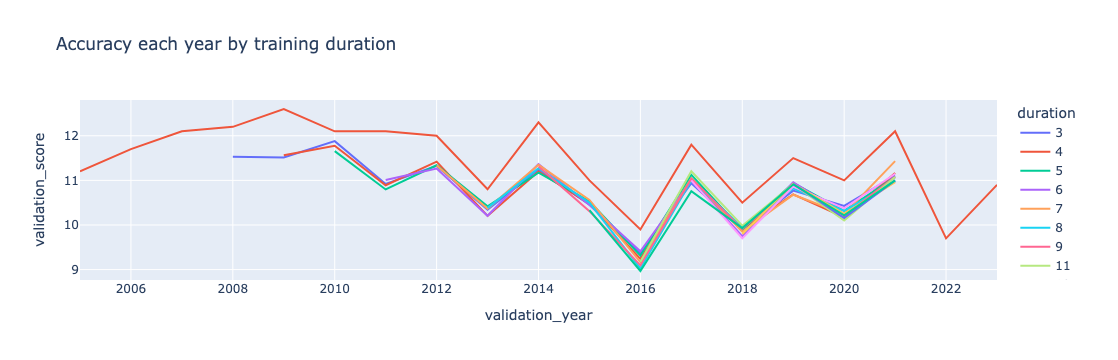

In [92]:
fig = px.line(accuracy_scores, x="validation_year", y="validation_score", color="duration", title = "Accuracy each year by training duration")
fig.show()
fig.write_html("../output/visualizations/accuracy/duration_accuracy.html")

In [98]:
mean_var = accuracy_scores[accuracy_scores["validation_year"] >= 2019].groupby(by="duration")["validation_score"].agg(["mean", "std"]).sort_values(by=["mean"])
mean_var

,mean,std
duration,,
4,10.673093,0.495890
14,10.692313,0.465804
11,10.696808,0.523890
8,10.707304,0.347884
10,10.709240,0.428168
13,10.711653,0.403041
9,10.722748,0.454585
6,10.727389,0.414116
3,10.767850,0.338823


In [100]:
mean_var.sort_values(by="std")

,mean,std
duration,,
3,10.767850,0.338823
8,10.707304,0.347884
12,10.793946,0.392757
13,10.711653,0.403041
5,10.777122,0.404525
6,10.727389,0.414116
10,10.709240,0.428168
9,10.722748,0.454585
14,10.692313,0.465804


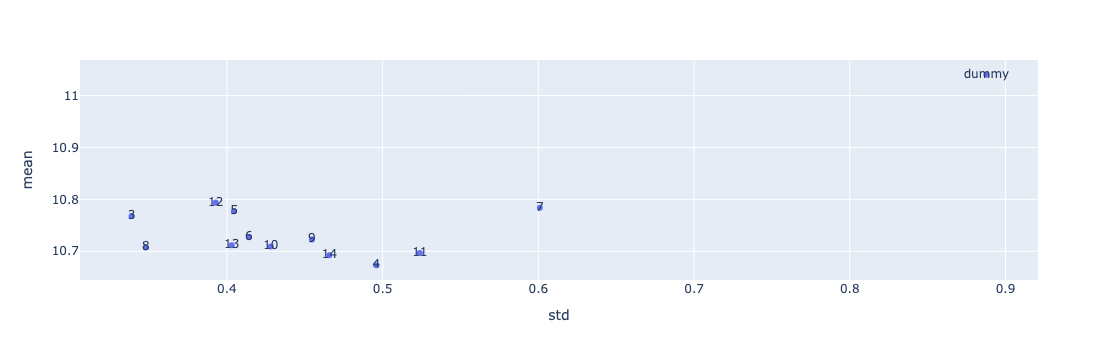

In [99]:
fig=px.scatter(mean_var, x="std", y="mean", text=mean_var.index)
fig.show()

## Get feature importance

Best duration considering mean and std is 8 years

In [102]:
# Extract averaged feature importances for duration 8
duration = 8
average_feature_importances = aggregated_results[duration]['mean_importance']

In [104]:
feature_names = X.drop(columns=["year", "game_datetime"]).columns.tolist()
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': average_feature_importances
})
importance_df = importance_df.sort_values(by="importance", ascending=False)

In [109]:
importance_df["cumulative_importance"] = importance_df["importance"].cumsum()


In [110]:
print(importance_df["cumulative_importance"].sum())
print(importance_df)

425.2886177822375
                                               feature  importance  \
426    rankings_predictive_rating_matchup_differential    0.143787   
215                          home_rankings_road_rating    0.005447   
427          rankings_home_rating_matchup_differential    0.004924   
433  offense_scoring_points_per_game_delta_matchup_...    0.004520   
129        home_defense_total_4th_down_conversion_pcnt    0.004282   
213                    home_rankings_predictive_rating    0.003967   
430          rankings_luck_rating_matchup_differential    0.003760   
431   rankings_consistency_rating_matchup_differential    0.003513   
214                          home_rankings_home_rating    0.003318   
219                   home_rankings_consistency_rating    0.003270   
421                          road_rankings_road_rating    0.003209   
218                          home_rankings_luck_rating    0.003149   
510  offense_special_teams_gross_punt_ypa_matchup_d...    0.003113   
42

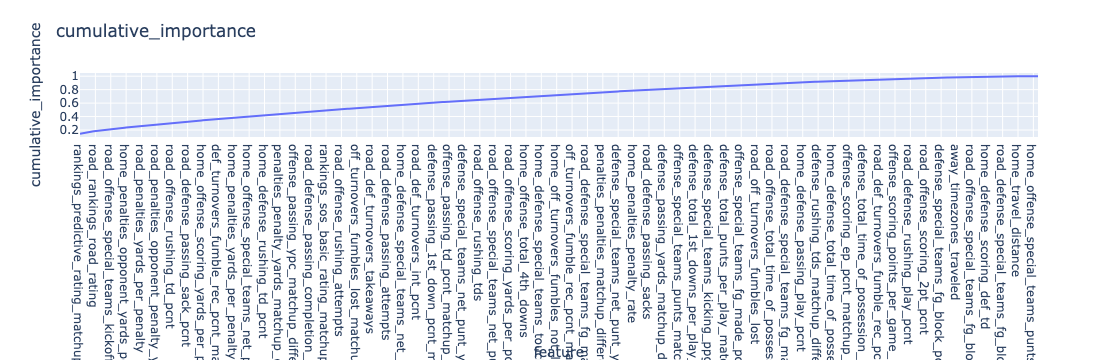

In [111]:
fig = px.line(importance_df, x='feature', y="cumulative_importance", title="cumulative_importance")
fig.show()
fig.write_html("../output/visualizations/feature_importance/feature_importance_cumsum_d8.html")

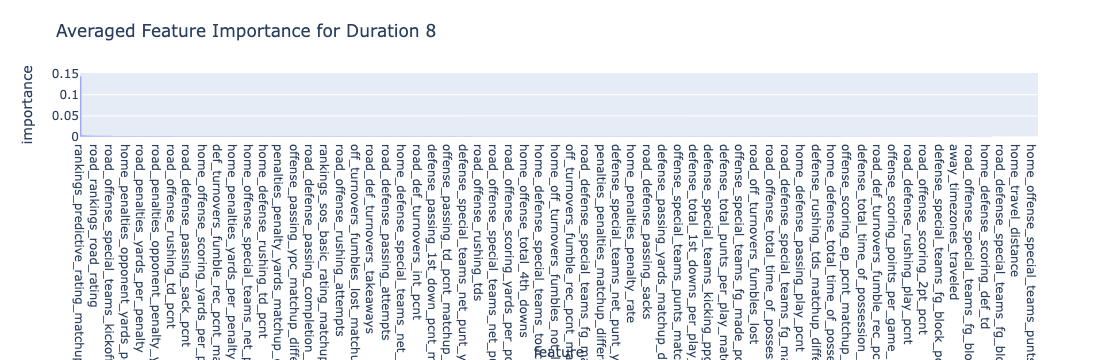

In [113]:
fig = px.bar(importance_df, x='feature', y='importance', title='Averaged Feature Importance for Duration 8')
fig.show()
fig.write_html("../output/visualizations/feature_importance/feature_importance_d8.html")

In [114]:
importance_df.to_csv("../output/feature_analysis/feature_importance_d8.csv")


In [118]:
importance_df.shape

(624, 3)

In [116]:
for i, row in importance_df.iterrows():
    print(f'"{row["feature"]},"')

"rankings_predictive_rating_matchup_differential,"
"home_rankings_road_rating,"
"rankings_home_rating_matchup_differential,"
"offense_scoring_points_per_game_delta_matchup_differential,"
"home_defense_total_4th_down_conversion_pcnt,"
"home_rankings_predictive_rating,"
"rankings_luck_rating_matchup_differential,"
"rankings_consistency_rating_matchup_differential,"
"home_rankings_home_rating,"
"home_rankings_consistency_rating,"
"road_rankings_road_rating,"
"home_rankings_luck_rating,"
"offense_special_teams_gross_punt_ypa_matchup_differential,"
"road_rankings_consistency_rating,"
"road_defense_total_seconds_per_play,"
"road_offense_total_4th_down_conversion_pcnt,"
"home_rankings_home_advantage_rating,"
"defense_special_teams_gross_punt_ypa_matchup_differential,"
"defense_total_4th_down_conversion_pcnt_matchup_differential,"
"road_offense_passing_ypa,"
"road_offense_special_teams_kickoff_touchback_pcnt,"
"road_offense_special_teams_gross_punt_ypa,"
"road_rankings_home_rating,"
"road_pena

In [ ]:
keep = 
[
    'home_offense_special_teams_net_punt_ypa',
'offense_special_teams_net_punt_ypa_all_matchup_differential',
'offense_special_teams_gross_punt_ypa_matchup_differential',
'offense_special_teams_fg_made_pcnt_matchup_differential',
'road_defense_passing_attempts',
'road_defense_passing_completion_pcnt',
'road_defense_passing_ypa',
'road_defense_passing_ypc',
'road_defense_passing_1st_downs',
'road_defense_passing_td_pcnt',
'road_defense_passing_pass_rtg',
'road_defense_passing_sack_pcnt',
'road_defense_passing_sacks',
'road_defense_passing_1st_down_pcnt',
'road_defense_rushing_attempts',
'road_defense_rushing_ypg',
'road_defense_rushing_ypa',
'road_defense_rushing_td_pcnt',
'road_defense_rushing_1st_down_pcnt',
'road_defense_scoring_yards_per_point',
'road_defense_scoring_rz_attempts',
'road_defense_scoring_rz_td_pcnt',
'road_def_turnovers_fumbles',
'road_def_turnovers_takeaways',
'road_def_turnovers_int_pcnt',
'road_defense_total_plays',
'road_defense_total_yards_per_play',
'road_defense_total_3rd_downs',
'road_defense_total_4th_downs',
'road_defense_total_seconds_per_play',
'road_defense_total_1st_downs_per_play',
'road_defense_total_3rd_down_conversion_pcnt',
'road_defense_total_4th_down_conversion_pcnt',
'road_defense_total_punts_per_play',
'road_defense_total_punts_per_score',
'road_defense_total_solo_tackles',
'road_defense_total_assisted_tackles',
'home_off_turnovers_fumbles',
'home_off_turnovers_int_pcnt',
'off_turnovers_fumbles_matchup_differential',
'off_turnovers_int_pcnt_matchup_differential',
'home_offense_passing_completion_pcnt',
'home_offense_passing_ypa',
'home_offense_passing_ypc',
'home_offense_passing_td_pcnt',
'home_offense_passing_sack_pcnt',
'home_offense_passing_1st_down_pcnt',
'home_offense_passing_pass_rtg',
'offense_passing_completion_pcnt_matchup_differential',
'offense_passing_ypa_matchup_differential',
'offense_passing_ypc_matchup_differential',
'offense_passing_sack_pcnt_matchup_differential',
'offense_passing_1st_downs_matchup_differential',
'offense_passing_1st_down_pcnt_matchup_differential',
'offense_passing_pass_rtg_matchup_differential',
'home_offense_rushing_ypa',
'home_offense_rushing_td_pcnt',
'offense_rushing_ypa_matchup_differential',
'offense_rushing_td_pcnt_matchup_differential',
'home_offense_scoring_points_per_game',
'home_offense_scoring_points_per_game_delta',
'home_offense_scoring_yards_per_point',
'home_offense_scoring_yards_per_point_delta',
'home_offense_scoring_points_per_play',
'home_offense_scoring_rz_td_pcnt',
'offense_scoring_points_per_game_matchup_differential',
'offense_scoring_points_per_game_delta_matchup_differential',
'offense_scoring_yards_per_point_matchup_differential',
'offense_scoring_yards_per_point_delta_matchup_differential',
'offense_scoring_points_per_play_matchup_differential',
'home_offense_total_yards',
'home_offense_total_plays',
'home_offense_total_yards_per_play',
'home_offense_total_1st_downs',
'home_offense_total_3rd_downs',
'home_offense_total_3rd_down_conversions',
'home_offense_total_4th_downs',
'home_offense_total_4th_down_conversions',
'home_offense_total_seconds_per_play',
'home_offense_total_1st_downs_per_play',
'home_offense_total_3rd_down_conversion_pcnt',
'home_offense_total_4th_down_conversion_pcnt',
'home_offense_total_punts_per_play',
'home_offense_total_punts_per_score',
'home_offense_total_opp_tackles',
'home_offense_total_opp_solo_tackles',
'home_offense_total_opp_asst_tackles',
'offense_total_yards_matchup_differential',
'offense_total_plays_matchup_differential',
'offense_total_yards_per_play_matchup_differential',
'offense_total_1st_downs_matchup_differential',
'offense_total_3rd_downs_matchup_differential',
'offense_total_3rd_down_conversions_matchup_differential',
'offense_total_4th_downs_matchup_differential',
'offense_total_4th_down_conversions_matchup_differential',
'offense_total_seconds_per_play_matchup_differential',
'offense_total_1st_downs_per_play_matchup_differential',
'offense_total_3rd_down_conversion_pcnt_matchup_differential',
'offense_total_4th_down_conversion_pcnt_matchup_differential',
'offense_total_punts_per_play_matchup_differential',
'offense_total_punts_per_score_matchup_differential',
'offense_total_opp_tackles_matchup_differential',
'offense_total_opp_solo_tackles_matchup_differential',
'offense_total_opp_asst_tackles_matchup_differential',
'home_penalties_opponent_penalty_yards',
'home_penalties_opponent_penalty_1st_downs',
'home_penalties_opponent_yards_per_penalty',
'penalties_opponent_penalty_yards_matchup_differential',
'penalties_opponent_penalty_1st_downs_matchup_differential',
'penalties_opponent_yards_per_penalty_matchup_differential',
'home_penalties_penalties',
'home_penalties_yards_per_penalty',
'penalties_penalties_matchup_differential',
'penalties_yards_per_penalty_matchup_differential',
'home_rankings_home_advantage_rating',
'home_rankings_home_rating',
'road_rankings_home_advantage_rating',
'road_rankings_home_rating',
'rankings_home_rating_matchup_differential',
'home_rankings_consistency_rating',
'road_rankings_consistency_rating',
'rankings_consistency_rating_matchup_differential',
'home_rankings_luck_rating',
'road_rankings_luck_rating',
'rankings_luck_rating_matchup_differential',
'home_rankings_road_rating',
'road_rankings_road_rating',
'home_rankings_sos_basic_rating',
'road_rankings_sos_basic_rating',
'rankings_sos_basic_rating_matchup_differential',
'home_rankings_predictive_rating',
'road_rankings_predictive_rating',
'rankings_predictive_rating_matchup_differential',
'defense_special_teams_fg_made_pcnt_matchup_differential',
'road_offense_special_teams_gross_punt_ypa',
'road_offense_special_teams_net_punt_ypa',
'defense_special_teams_net_punt_ypa_all_matchup_differential',
'defense_special_teams_gross_punt_ypa_matchup_differential',
'home_defense_special_teams_gross_punt_yards',
'home_defense_special_teams_net_punt_yards',
'home_defense_special_teams_gross_punt_ypa',
'home_defense_special_teams_net_punt_ypa',
'road_defense_special_teams_gross_punt_yards',
'road_defense_special_teams_net_punt_yards',
'road_defense_special_teams_gross_punt_ypa',
'road_defense_special_teams_net_punt_ypa',
'home_defense_passing_attempts',
'home_defense_passing_completion_pcnt',
'home_defense_passing_ypa',
'home_defense_passing_ypc',
'home_defense_passing_1st_downs',
'home_defense_passing_td_pcnt',
'home_defense_passing_pass_rtg',
'home_defense_passing_sack_pcnt',
'home_defense_passing_sacks',
'home_defense_passing_1st_down_pcnt',
'home_defense_rushing_attempts',
'home_defense_rushing_ypg',
'home_defense_rushing_ypa',
'home_defense_rushing_td_pcnt',
'home_defense_rushing_1st_down_pcnt',
'home_defense_scoring_yards_per_point',
'home_defense_scoring_rz_attempts',
'home_defense_scoring_rz_td_pcnt',
'home_def_turnovers_fumbles',
'home_def_turnovers_takeaways',
'home_def_turnovers_int_pcnt',
'home_defense_total_plays',
'home_defense_total_yards_per_play',
'home_defense_total_3rd_downs',
'home_defense_total_4th_downs',
'home_defense_total_seconds_per_play',
'home_defense_total_1st_downs_per_play',
'home_defense_total_3rd_down_conversion_pcnt',
'home_defense_total_4th_down_conversion_pcnt',
'home_defense_total_punts_per_play',
'home_defense_total_punts_per_score',
'home_defense_total_solo_tackles',
'home_defense_total_assisted_tackles',
'road_off_turnovers_fumbles',
'road_off_turnovers_int_pcnt',
'def_turnovers_fumbles_matchup_differential',
'def_turnovers_int_pcnt_matchup_differential',
'road_offense_passing_attempts',
'road_offense_passing_incompletions',
'road_offense_passing_completion_pcnt',
'road_offense_passing_ypa',
'road_offense_passing_ypc',
'road_offense_passing_td_pcnt',
'road_offense_passing_sack_pcnt',
'road_offense_passing_1st_down_pcnt',
'road_offense_passing_pass_rtg',
'defense_passing_incompletions_matchup_differential',
'defense_passing_completion_pcnt_matchup_differential',
'defense_passing_ypa_matchup_differential',
'defense_passing_ypc_matchup_differential',
'defense_passing_td_pcnt_matchup_differential',
'defense_passing_sack_pcnt_matchup_differential',
'defense_passing_1st_down_pcnt_matchup_differential',
'defense_passing_pass_rtg_matchup_differential',
'defense_passing_play_pcnt_matchup_differential',
'defense_rushing_ypa_matchup_differential',
'defense_rushing_td_pcnt_matchup_differential',
'defense_rushing_1st_down_pcnt_matchup_differential',
'road_offense_scoring_points_per_game',
'road_offense_scoring_points_per_game_delta',
'road_offense_scoring_yards_per_point',
'road_offense_scoring_yards_per_point_delta',
'road_offense_scoring_points_per_play',
'road_offense_scoring_rz_td_pcnt',
'road_offense_total_yards',
'road_offense_total_plays',
'road_offense_total_yards_per_play',
'road_offense_total_1st_downs',
'road_offense_total_3rd_downs',
'road_offense_total_3rd_down_conversions',
'road_offense_total_4th_downs',
'road_offense_total_4th_down_conversions',
'road_offense_total_seconds_per_play',
'road_offense_total_1st_downs_per_play',
'road_offense_total_3rd_down_conversion_pcnt',
'road_offense_total_4th_down_conversion_pcnt',
'road_offense_total_punts_per_play',
'road_offense_total_punts_per_score',
'road_offense_total_opp_tackles',
'road_offense_total_opp_solo_tackles',
'road_offense_total_opp_asst_tackles',
'defense_total_yards_matchup_differential',
'defense_total_plays_matchup_differential',
'defense_total_yards_per_play_matchup_differential',
'defense_total_1st_downs_matchup_differential',
'defense_total_3rd_downs_matchup_differential',
'defense_total_3rd_down_conversions_matchup_differential',
'defense_total_4th_downs_matchup_differential',
'defense_total_4th_down_conversions_matchup_differential',
'defense_total_time_of_possession_matchup_differential',
'defense_total_seconds_per_play_matchup_differential',
'defense_total_1st_downs_per_play_matchup_differential',
'defense_total_3rd_down_conversion_pcnt_matchup_differential',
'defense_total_4th_down_conversion_pcnt_matchup_differential',
'defense_total_punts_per_play_matchup_differential',
'defense_total_punts_per_score_matchup_differential',
'defense_total_tackles_matchup_differential',
'defense_total_solo_tackles_matchup_differential',
'defense_total_assisted_tackles_matchup_differential',
'road_penalties_opponent_penalty_yards',
'road_penalties_opponent_penalty_1st_downs',
'road_penalties_opponent_yards_per_penalty',
'road_penalties_penalties',
'road_penalties_yards_per_penalty',
'home_days_rest',
'away_days_rest',
'rest_differential',
'week',
'game_time_hrs',
'type_id',
'venue_indoor',
'home_timezones_traveled',
'away_timezones_traveled',
'timezones_traveled_delta',
'home_travel_distance',
'away_travel_distance',
'travel_delta',
]